## Содержание

1. Импорт данных и пакетов Python
2. Оценка качества данных и отсутствующих значений
3. Исследовательский анализ данных
4. Логистическая регрессия и результаты

## 1. Импорт данных и пакетов Python

In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [2]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("V_K_train.csv", sep=';')

# Read CSV test data file into DataFrame
test_df = pd.read_csv("V_K_test.csv", sep=';')

# preview train data
train_df.head()

,*,churn,totalnightcalls,internationalplan,totaleveminutes,totalintlcharge,totalevecharge,totalnightminutes,totaldaycalls,numbervmailmessages,totalevecalls
0,2158,No,c,no,"[0,150]",b,b,"(200,250]",c,a,d
1,1645,No,c,no,"(150,200]",b,b,"(150,200]",b,a,c
2,1985,Yes,c,no,"(200,250]",d,c,"(150,200]",d,a,c
3,1438,No,d,yes,"(200,250]",b,c,"(200,250]",d,d,c
4,2813,No,c,no,"(200,250]",b,d,"(250,400]",c,d,d


In [3]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 900.


In [4]:
# preview test data
test_df.head()

,*,churn,totalnightcalls,internationalplan,totaleveminutes,totalintlcharge,totalevecharge,totalnightminutes,totaldaycalls,numbervmailmessages,totalevecalls
0,1710,No,b,no,"(250,400]",b,d,"(150,200]",b,a,b
1,3703,Yes,d,no,"(250,400]",a,d,"(250,400]",c,a,c
2,3069,No,c,no,"(200,250]",b,c,"[0,150]",b,b,c
3,2126,No,c,no,"(200,250]",a,c,"(250,400]",a,c,d
4,3204,No,c,no,"(250,400]",a,d,"(250,400]",c,d,c


In [5]:
train_df.drop(train_df.columns[[0]], axis=1, inplace=True)
test_df.drop(test_df.columns[[0]], axis=1, inplace=True)
train_df['churn'] = train_df['churn'].map({'Yes': 1, 'No': 0})
test_df['churn'] = test_df['churn'].map({'Yes': 1, 'No': 0})
train_df['internationalplan'] = train_df['internationalplan'].map({'yes': 1, 'no': 0})
test_df['internationalplan'] = test_df['internationalplan'].map({'yes': 1, 'no': 0})

In [6]:
train_df.head()

,churn,totalnightcalls,internationalplan,totaleveminutes,totalintlcharge,totalevecharge,totalnightminutes,totaldaycalls,numbervmailmessages,totalevecalls
0,0,c,0,"[0,150]",b,b,"(200,250]",c,a,d
1,0,c,0,"(150,200]",b,b,"(150,200]",b,a,c
2,1,c,0,"(200,250]",d,c,"(150,200]",d,a,c
3,0,d,1,"(200,250]",b,c,"(200,250]",d,d,c
4,0,c,0,"(200,250]",b,d,"(250,400]",c,d,d


In [7]:
test_df.head()

,churn,totalnightcalls,internationalplan,totaleveminutes,totalintlcharge,totalevecharge,totalnightminutes,totaldaycalls,numbervmailmessages,totalevecalls
0,0,b,0,"(250,400]",b,d,"(150,200]",b,a,b
1,1,d,0,"(250,400]",a,d,"(250,400]",c,a,c
2,0,c,0,"(200,250]",b,c,"[0,150]",b,b,c
3,0,c,0,"(200,250]",a,c,"(250,400]",a,c,d
4,0,c,0,"(250,400]",a,d,"(250,400]",c,d,c


In [8]:
print('The number of samples into the test data is {}.'.format(test_df.shape[0]))

The number of samples into the test data is 100.


In [9]:
# check missing values in train data
train_df.isnull().sum()

churn                  0
totalnightcalls        0
internationalplan      0
totaleveminutes        0
totalintlcharge        0
totalevecharge         0
totalnightminutes      0
totaldaycalls          0
numbervmailmessages    0
totalevecalls          0
dtype: int64

## 2. Оценка качества данных 

#### 2.1. Построим гистограммы распределения частот признаков

total night calls distribution:
c    434
d    378
b     50
e     37
a      1
Name: totalnightcalls, dtype: int64


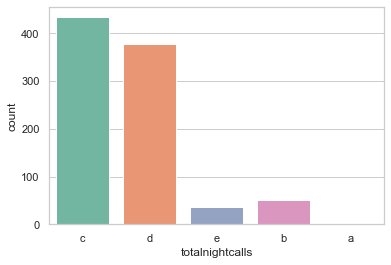

In [10]:
print('total night calls distribution:')
print(train_df['totalnightcalls'].value_counts())
sns.countplot(x='totalnightcalls', data=train_df, palette='Set2')
plt.show()

In [11]:
# check missing values in adjusted train data
print('The most common totalnightcalls is %s.' %train_df['totalnightcalls'].value_counts().idxmax())

The most common totalnightcalls is c.


total minutes distribution:
(150,200]    323
(200,250]    312
[0,150]      133
(250,400]    132
Name: totaleveminutes, dtype: int64


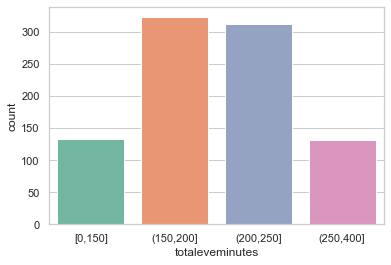

In [12]:
print('total minutes distribution:')
print(train_df['totaleveminutes'].value_counts())
sns.countplot(x='totaleveminutes', data=train_df, palette='Set2')
plt.show()

total intl charge distribution:
b    430
c    276
a    153
d     40
e      1
Name: totalintlcharge, dtype: int64


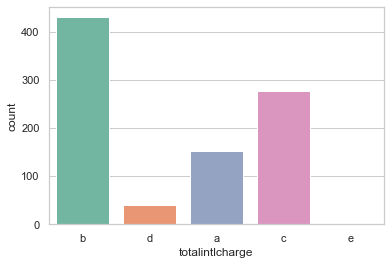

In [13]:
print('total intl charge distribution:')
print(train_df['totalintlcharge'].value_counts())
sns.countplot(x='totalintlcharge', data=train_df, palette='Set2')
plt.show()

total eve charge distribution:
c     420
b     241
d     164
a      44
e      30
cc      1
Name: totalevecharge, dtype: int64


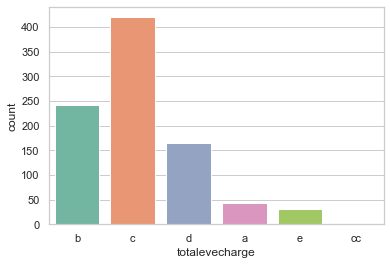

In [14]:
print('total eve charge distribution:')
print(train_df['totalevecharge'].value_counts())
sns.countplot(x='totalevecharge', data=train_df, palette='Set2')
plt.show()

total nigh tminutes distribution:
(150,200]    316
(200,250]    309
(250,400]    140
[0,150]      135
Name: totalnightminutes, dtype: int64


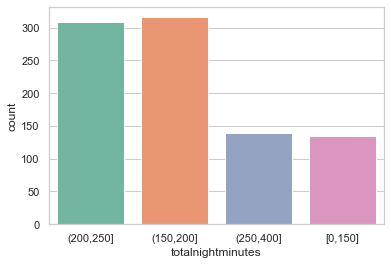

In [15]:
print('total nigh tminutes distribution:')
print(train_df['totalnightminutes'].value_counts())
sns.countplot(x='totalnightminutes', data=train_df, palette='Set2')
plt.show()

total day calls distribution:
c    419
d    214
b    212
a     30
e     25
Name: totaldaycalls, dtype: int64


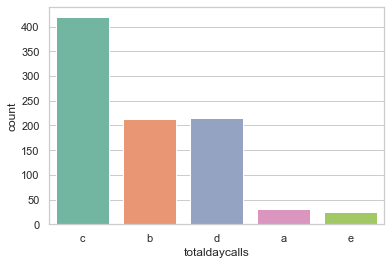

In [16]:
print('total day calls distribution:')
print(train_df['totaldaycalls'].value_counts())
sns.countplot(x='totaldaycalls', data=train_df, palette='Set2')
plt.show()

number v mail messages distribution:
a    673
c    117
d     65
b     37
e      8
Name: numbervmailmessages, dtype: int64


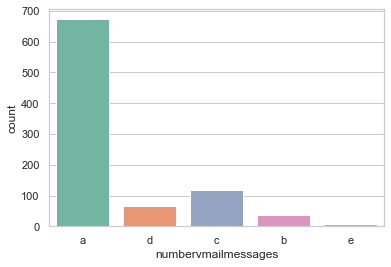

In [17]:
print('number v mail messages distribution:')
print(train_df['numbervmailmessages'].value_counts())
sns.countplot(x='numbervmailmessages', data=train_df, palette='Set2')
plt.show()

total eve calls distribution:
c     492
d     279
b     101
e      26
a       1
88      1
Name: totalevecalls, dtype: int64


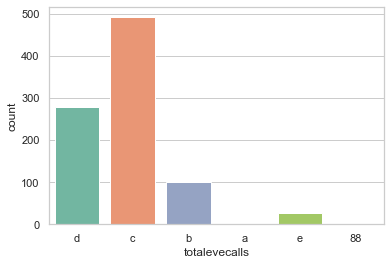

In [18]:
print('total eve calls distribution:')
print(train_df['totalevecalls'].value_counts())
sns.countplot(x='totalevecalls', data=train_df, palette='Set2')
plt.show()

In [19]:
# preview adjusted train data
train_df.head()

,churn,totalnightcalls,internationalplan,totaleveminutes,totalintlcharge,totalevecharge,totalnightminutes,totaldaycalls,numbervmailmessages,totalevecalls
0,0,c,0,"[0,150]",b,b,"(200,250]",c,a,d
1,0,c,0,"(150,200]",b,b,"(150,200]",b,a,c
2,1,c,0,"(200,250]",d,c,"(150,200]",d,a,c
3,0,d,1,"(200,250]",b,c,"(200,250]",d,d,c
4,0,c,0,"(200,250]",b,d,"(250,400]",c,d,d


In [20]:
cat_vars=['churn', 'totalnightcalls', 'internationalplan', 'totaleveminutes', 
          'totalintlcharge', 'totalevecharge', 'totalnightminutes', 
          'totaldaycalls', 'numbervmailmessages', 'totalevecalls']
for var in cat_vars:
    cat_list='list'+'_'+var
    cat_list = pd.get_dummies(train_df[var], prefix=var)
    datal=train_df.join(cat_list)
    train_df=datal
    
train_df.head()

,churn,totalnightcalls,internationalplan,totaleveminutes,totalintlcharge,totalevecharge,totalnightminutes,totaldaycalls,numbervmailmessages,totalevecalls,...,numbervmailmessages_b,numbervmailmessages_c,numbervmailmessages_d,numbervmailmessages_e,totalevecalls_88,totalevecalls_a,totalevecalls_b,totalevecalls_c,totalevecalls_d,totalevecalls_e
0,0,c,0,"[0,150]",b,b,"(200,250]",c,a,d,...,0,0,0,0,0,0,0,0,1,0
1,0,c,0,"(150,200]",b,b,"(150,200]",b,a,c,...,0,0,0,0,0,0,0,1,0,0
2,1,c,0,"(200,250]",d,c,"(150,200]",d,a,c,...,0,0,0,0,0,0,0,1,0,0
3,0,d,1,"(200,250]",b,c,"(200,250]",d,d,c,...,0,0,1,0,0,0,0,1,0,0
4,0,c,0,"(200,250]",b,d,"(250,400]",c,d,d,...,0,0,1,0,0,0,0,0,1,0


In [21]:
train_df.drop('totalnightcalls', axis=1, inplace=True)
train_df.drop('totaleveminutes', axis=1, inplace=True)
train_df.drop('totalintlcharge', axis=1, inplace=True)
train_df.drop('totalevecharge', axis=1, inplace=True)
train_df.drop('totalnightminutes', axis=1, inplace=True)
train_df.drop('totaldaycalls', axis=1, inplace=True)
train_df.drop('numbervmailmessages', axis=1, inplace=True)
train_df.drop('totalevecalls', axis=1, inplace=True)
train_df.drop('churn_0', axis=1, inplace=True)
train_df.drop('churn_1', axis=1, inplace=True)
train_df.drop('internationalplan_0', axis=1, inplace=True)
train_df.drop('internationalplan_1', axis=1, inplace=True)


In [22]:
train_df.head()

,churn,internationalplan,totalnightcalls_a,totalnightcalls_b,totalnightcalls_c,totalnightcalls_d,totalnightcalls_e,"totaleveminutes_(150,200]","totaleveminutes_(200,250]","totaleveminutes_(250,400]",...,numbervmailmessages_b,numbervmailmessages_c,numbervmailmessages_d,numbervmailmessages_e,totalevecalls_88,totalevecalls_a,totalevecalls_b,totalevecalls_c,totalevecalls_d,totalevecalls_e
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [23]:
train_df.columns

Index(['churn', 'internationalplan', 'totalnightcalls_a', 'totalnightcalls_b',
       'totalnightcalls_c', 'totalnightcalls_d', 'totalnightcalls_e',
       'totaleveminutes_(150,200]', 'totaleveminutes_(200,250]',
       'totaleveminutes_(250,400]', 'totaleveminutes_[0,150]',
       'totalintlcharge_a', 'totalintlcharge_b', 'totalintlcharge_c',
       'totalintlcharge_d', 'totalintlcharge_e', 'totalevecharge_a',
       'totalevecharge_b', 'totalevecharge_c', 'totalevecharge_cc',
       'totalevecharge_d', 'totalevecharge_e', 'totalnightminutes_(150,200]',
       'totalnightminutes_(200,250]', 'totalnightminutes_(250,400]',
       'totalnightminutes_[0,150]', 'totaldaycalls_a', 'totaldaycalls_b',
       'totaldaycalls_c', 'totaldaycalls_d', 'totaldaycalls_e',
       'numbervmailmessages_a', 'numbervmailmessages_b',
       'numbervmailmessages_c', 'numbervmailmessages_d',
       'numbervmailmessages_e', 'totalevecalls_88', 'totalevecalls_a',
       'totalevecalls_b', 'totalevecalls_c', '

In [24]:
test_data = test_df.copy()
cat_vars=['churn', 'totalnightcalls', 'internationalplan', 'totaleveminutes', 
          'totalintlcharge', 'totalevecharge', 'totalnightminutes', 
          'totaldaycalls', 'numbervmailmessages', 'totalevecalls']
for var in cat_vars:
    cat_list='list'+'_'+var
    cat_list = pd.get_dummies(test_df[var], prefix=var)
    datal=test_df.join(cat_list)
    test_df=datal
    


In [25]:
cols = ['churn', 'internationalplan', 'totalnightcalls_e', 'totalintlcharge_d', 'totalevecharge_a', 'totalevecharge_e', 'totalnightminutes_[0,150]', 'totaldaycalls_b', 'totaldaycalls_e', 'numbervmailmessages_a', 'numbervmailmessages_b', 'numbervmailmessages_d', 'numbervmailmessages_e', 'totalevecalls_e']  
test_data = test_df[cols]
final_test = test_data
final_test.head()

,churn,internationalplan,totalnightcalls_e,totalintlcharge_d,totalevecharge_a,totalevecharge_e,"totalnightminutes_[0,150]",totaldaycalls_b,totaldaycalls_e,numbervmailmessages_a,numbervmailmessages_b,numbervmailmessages_d,numbervmailmessages_e,totalevecalls_e
0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Логистическая регрессия и результаты

При наличии внешней функции оуенки, которая назначает веса признакам, рекурсивное исключение признаков (RFE) заключается в выборе признаков путем рекурсивного рассмотрения все меньших наборов признаков. Сначала оценщик обучается на начальном наборе функций, и важность каждой функции определяется либо с помощью атрибута coef_, либо с помощью атрибута feature_importances_. Затем наименее важные функции удаляются из текущего набора функций. Эта процедура рекурсивно повторяется для сокращенного набора до тех пор, пока в конечном итоге не будет достигнуто желаемое количество функций для выбора.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ['internationalplan', 'totalnightcalls_a', 'totalnightcalls_b',
       'totalnightcalls_c', 'totalnightcalls_d', 'totalnightcalls_e',
       'totaleveminutes_(150,200]', 'totaleveminutes_(200,250]',
       'totaleveminutes_(250,400]', 'totaleveminutes_[0,150]',
       'totalintlcharge_a', 'totalintlcharge_b', 'totalintlcharge_c',
       'totalintlcharge_d', 'totalintlcharge_e', 'totalevecharge_a',
       'totalevecharge_b', 'totalevecharge_c', 'totalevecharge_cc',
       'totalevecharge_d', 'totalevecharge_e', 'totalnightminutes_(150,200]',
       'totalnightminutes_(200,250]', 'totalnightminutes_(250,400]',
       'totalnightminutes_[0,150]', 'totaldaycalls_a', 'totaldaycalls_b',
       'totaldaycalls_c', 'totaldaycalls_d', 'totaldaycalls_e',
       'numbervmailmessages_a', 'numbervmailmessages_b',
       'numbervmailmessages_c', 'numbervmailmessages_d',
       'numbervmailmessages_e', 'totalevecalls_88', 'totalevecalls_a',
       'totalevecalls_b', 'totalevecalls_c', 'totalevecalls_d',
       'totalevecalls_e']  
X = train_df[cols]
y = train_df['churn']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 8)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['internationalplan', 'totalintlcharge_d', 'totalevecharge_a', 'totalevecharge_e', 'totalnightminutes_[0,150]', 'numbervmailmessages_a', 'numbervmailmessages_b', 'totalevecalls_e']


## 4.1.2. Ранжирование функций с рекурсивным удалением функций и перекрестной проверкой
RFECV выполняет RFE в цикле перекрестной проверки, чтобы найти оптимальное или лучшее количество функций. В дальнейшем рекурсивное исключение функции применяется к логистической регрессии с автоматической настройкой количества функций, выбранных с перекрестной проверкой.

Optimal number of features: 13
Selected features: ['internationalplan', 'totalnightcalls_e', 'totalintlcharge_d', 'totalevecharge_a', 'totalevecharge_e', 'totalnightminutes_[0,150]', 'totaldaycalls_b', 'totaldaycalls_e', 'numbervmailmessages_a', 'numbervmailmessages_b', 'numbervmailmessages_d', 'numbervmailmessages_e', 'totalevecalls_e']


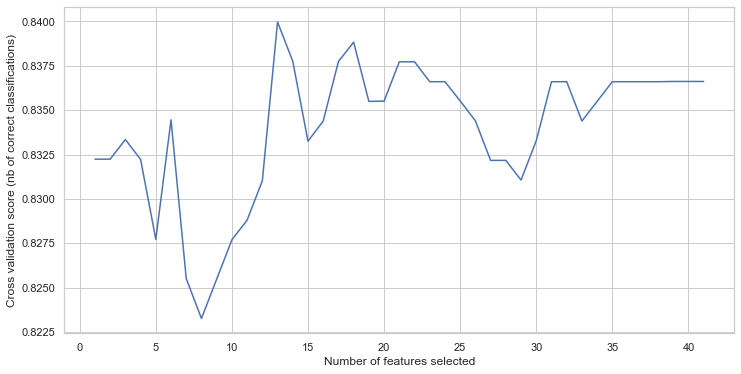

In [27]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=11, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(12,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

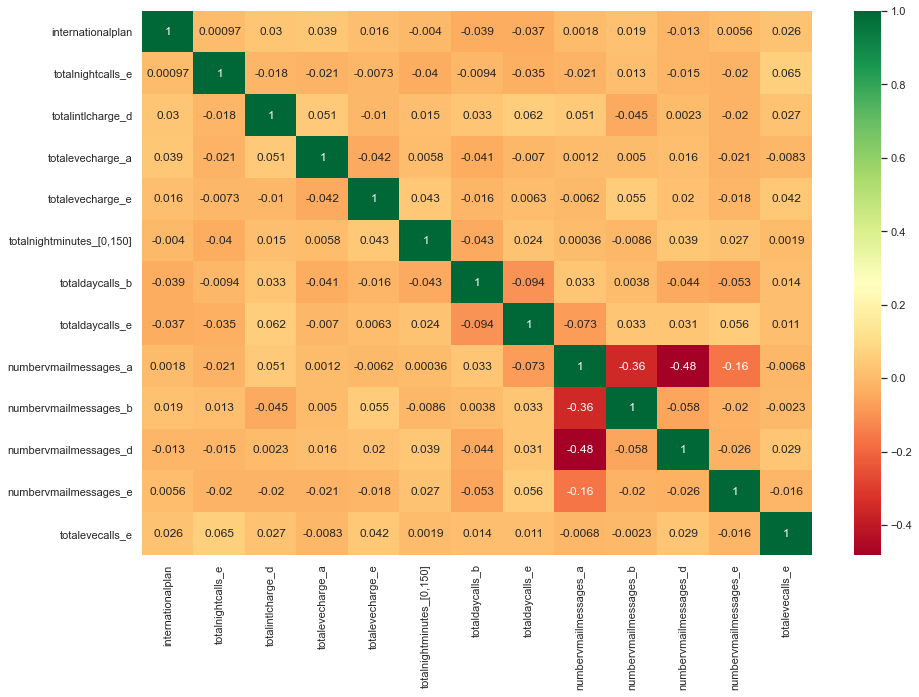

In [28]:
Selected_features = ['internationalplan', 'totalnightcalls_e', 'totalintlcharge_d', 
                     'totalevecharge_a', 'totalevecharge_e', 'totalnightminutes_[0,150]', 
                     'totaldaycalls_b', 'totaldaycalls_e', 'numbervmailmessages_a', 
                     'numbervmailmessages_b', 'numbervmailmessages_d', 'numbervmailmessages_e',
                     'totalevecalls_e']

X = train_df[Selected_features]

plt.subplots(figsize=(15, 10))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

## 4.2. Обзор процедур оценки модели
Нужен способ выбора между моделями машинного обучения.

Цель состоит в том, чтобы оценить вероятную производительность модели на данных вне выборки.
Первоначальная идея: тренировать и тестировать на одних и тех же данных

Но максимальная точность обучения вознаграждает слишком сложные модели, которые не соответствуют обучающим данным.
Альтернативная идея: разделить тренировку / тест

Разделить набор данных на две части, чтобы модель можно было обучить и протестировать на разных данных.
Точность тестирования - лучшая оценка, чем точность обучения производительности вне выборки
Проблема с разделением тренировка / тест
Он обеспечивает высокую оценку дисперсии, поскольку изменение того, какие наблюдения есть в наборе для тестирования, может значительно изменить точность тестирования.
Точность тестирования может сильно измениться в зависимости от того, какое наблюдение входит в набор для тестирования.

#### 4.2.1. Оценка модели на основе простого разделения тренировка / тест с использованием функции train_test_split ()

Train/Test split results:
LogisticRegression accuracy is 0.827
LogisticRegression log_loss is 0.409
LogisticRegression auc is 0.729


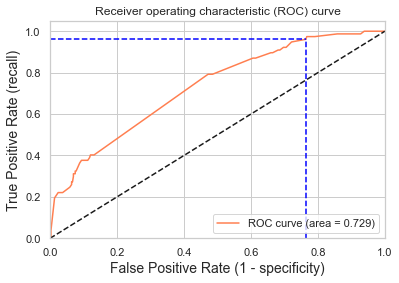

Using a threshold of 0.105 guarantees a sensitivity of 0.961 and a specificity of 0.236, i.e. a false positive rate of 76.41%.


In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = train_df[Selected_features]
y = train_df['churn']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

#### 4.2.2. Оценка модели на основе K-fold перекрестной проверки с использованием функции cross_val_score ()

In [30]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.840
LogisticRegression average log_loss is 0.412
LogisticRegression average auc is 0.694


#### 4.2.3. Оценка модели на основе K-fold перекрестной проверки с использованием функции cross_validate ()

In [31]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.840 (+/-0.017)
LogisticRegression average log_loss: 0.412 (+/-0.018)
LogisticRegression average auc: 0.694 (+/-0.031)


In [32]:
cols = ['churn', 'internationalplan', 'totaleveminutes_(250,400]', 'totalintlcharge_d', 'totalnightminutes_[0,150]', 'totaldaycalls_b', 'numbervmailmessages_a', 'numbervmailmessages_b']
X = train_df[cols]

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, train_df[cols], y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 1.000 (+/-0.000)
LogisticRegression average log_loss: 0.018 (+/-0.001)
LogisticRegression average auc: 1.000 (+/-0.000)


#### 4.3. Оценка GridSearchCV с использованием нескольких счетчиков одновременно

best params: LogisticRegression(C=1.2000100000000002)
best params: {'C': 1.2000100000000002}
best score: 0.8444444444444444


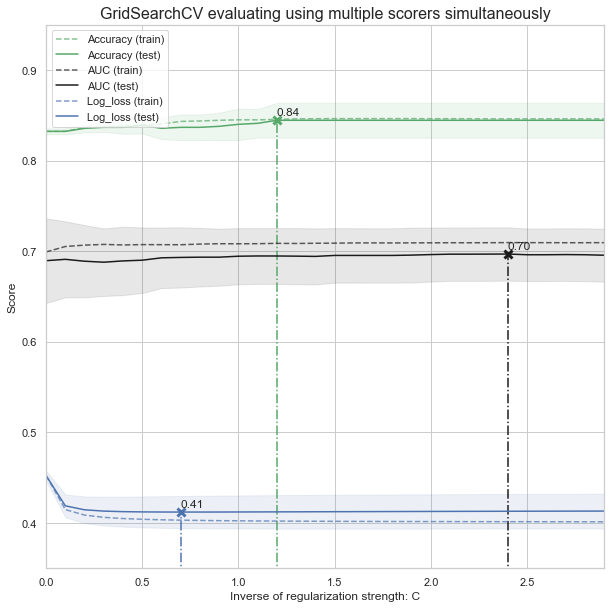

In [33]:
from sklearn.model_selection import GridSearchCV

X = train_df[Selected_features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

#### 4.4. Оценка GridSearchCV с использованием нескольких счетчиков, RepeatedStratifiedKFold для одновременной предварительной обработки
Мы можем применить множество оценок вместе для более глубокой оценки, например, gridsearch, используя перекрестную проверку, основанную на многократно повторяемых k-кратных суммах, которые можно масштабировать или не масштабировать по отношению ко многим оценкам и настраивать параметр для данной оценочной функции!

best params: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', LogisticRegression(C=2.9000100000000004))])
best params: {'clf__C': 2.9000100000000004}
best score: 0.8433333333333333


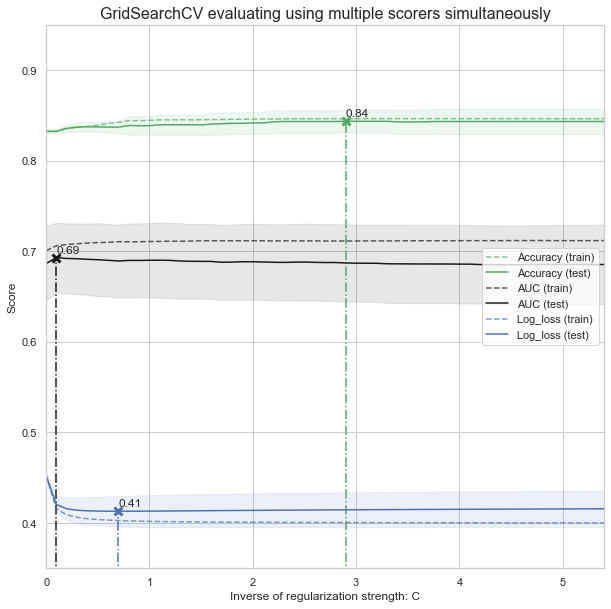

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()